In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('oil.csv')
df['date'] = pd.to_datetime(df['date'])

df

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


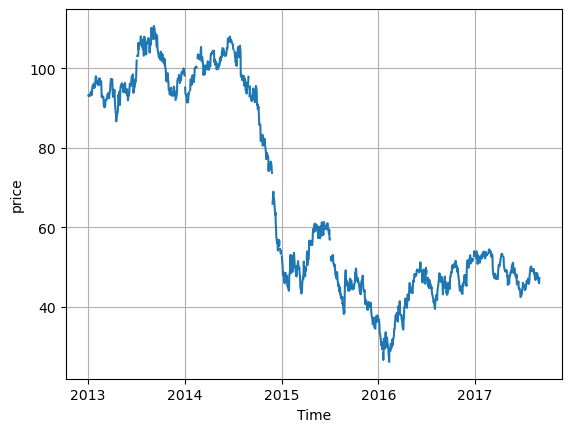

In [3]:
plt.plot(df['date'],df['dcoilwtico'])
plt.xlabel('Time')
plt.ylabel('price')
plt.grid(True)
plt.show()

In [4]:
df = df.drop(df.index[0])
df = df.fillna(method='bfill')
df

,date,dcoilwtico
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


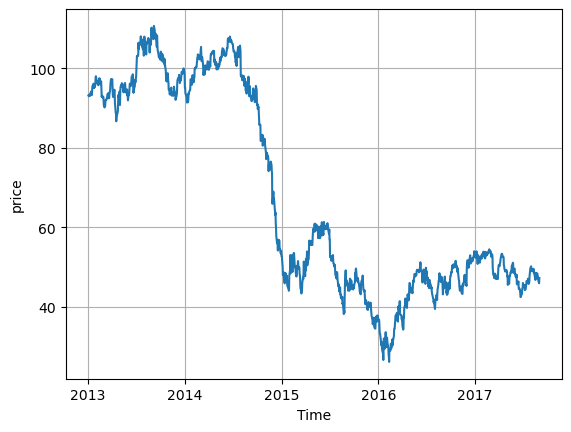

In [5]:
plt.plot(df['date'],df['dcoilwtico'])
plt.xlabel('Time')
plt.ylabel('price')
plt.grid(True)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scalers = {}
for x in df.columns:
  scalers[x] = StandardScaler().fit(df[x].values.reshape(-1, 1))

norm_df = df.copy()
for i, key in enumerate(scalers.keys()):
  norm = scalers[key].transform(norm_df.iloc[:, i].values.reshape(-1, 1))
  norm_df.iloc[:, i] = norm

norm_df

,date,dcoilwtico
1,-1.730624,0.994563
2,-1.728591,0.987929
3,-1.726558,0.993782
4,-1.720459,0.996904
5,-1.718425,0.997294
...,...,...
1213,1.717613,-0.780522
1214,1.723713,-0.829299
1215,1.725746,-0.826958
1216,1.727779,-0.846469


In [7]:
X = norm_df['date']
y = norm_df['dcoilwtico']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train

1     -1.730624
2     -1.728591
3     -1.726558
4     -1.720459
5     -1.718425
         ...   
969    1.026339
970    1.028373
971    1.030406
972    1.032439
973    1.034472
Name: date, Length: 973, dtype: float64

In [8]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()

print(X_train.shape,y_train.shape)

(973,) (973,)


In [9]:
# set hyperparameters
n_neuron       = 32
activation     = 'relu'
num_epochs     = 50
learning_rate  = 0.001
minibatch_size = 128
model_num      = 1
N_layers       = 2 # number of hidden layers

In [10]:
import os
import numpy as np
import xarray as xr
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout
from keras.layers import LSTM
from utils import * 

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model = Sequential()

dropout_rate = 0.2

model.add(Dense(n_neuron,  activation=activation, name="hidden_layer_1" ,input_shape=(1,)))

model.add(Dense(n_neuron,  activation=activation, name="hidden_layer_2"))

model.add(Dense(1,  activation='linear', name="output_layer")) # the output layer


model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

In [ ]:
model.summary()

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


history = model.fit(X_train, y_train, 
                    batch_size      = minibatch_size,
                    epochs          = num_epochs,
                    validation_split= 0.2, 
                    verbose         = 1,
                    callbacks       = [early_stop])

In [ ]:
plot_history(history)

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
import numpy as np

print("Shape of y_test:", y_test.shape)
print("Shape of predicted_values:", predicted_values.shape)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your model and obtained the true values and predicted values
true_values = y_test  # True values over time
predicted_values = model.predict(X_test)  # Predicted values over time

# Generate time axis
time = np.arange(len(true_values))

# Plotting the true values and predicted values over time
plt.plot(time, true_values, label='True Values')
plt.plot(time, predicted_values, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Oil Prices')
plt.title('True Values vs Predicted Values over Time')
plt.legend()
plt.show()